# Feature summary analysis of gender only differential expression

In [1]:
import numpy as np
import pandas as pd
from venn import venn
from matplotlib import pyplot as plt

from plotnine import *
from warnings import filterwarnings
from matplotlib.cbook import mplDeprecation
filterwarnings("ignore",category=mplDeprecation)

## Summary plots (FDR < 0.05)

### Genes

In [2]:
genes = pd.read_csv('../../_m/genes/diffExpr_maleVfemale_full.txt', sep='\t')
genes = genes[(genes['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
genes['Feature'] = genes.index
genes = genes[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
genes['Type'] = 'gene'
genes.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
ENSG00000226555.1,ENSG00000226555.1,AGKP1,ENSG00000226555,7.320836,4.214882e-258,gene
ENSG00000229236.1,ENSG00000229236.1,TTTY10,ENSG00000229236,7.483121,5.178977e-253,gene
ENSG00000176728.7,ENSG00000176728.7,TTTY14,ENSG00000176728,8.885118,2.323128e-251,gene
ENSG00000260197.1,ENSG00000260197.1,NaN,ENSG00000260197,7.071476,9.499938e-247,gene
ENSG00000241859.6,ENSG00000241859.6,ANOS2P,ENSG00000241859,7.682882,3.472081e-236,gene


### Exons

In [3]:
exons = pd.read_csv('../../_m/exons/diffExpr_maleVfemale_full.txt', sep='\t')
exons = exons[(exons['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
exons['Feature'] = exons.index
exons = exons[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
exons['Type'] = 'exon'
exons.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
e1160404,e1160404,XIST,ENSG00000229807,-7.980218,1.451491e-257,exon
e1160425,e1160425,XIST,ENSG00000229807,-7.056620,5.812736e-252,exon
e1160439,e1160439,XIST,ENSG00000229807,-8.172654,2.903277e-251,exon
e1160445,e1160445,XIST,ENSG00000229807,-9.047181,2.719706e-248,exon
e1160436,e1160436,XIST,ENSG00000229807,-8.507586,5.558094e-248,exon


### Junctions

In [4]:
juncs = pd.read_csv('../../_m/junctions/diffExpr_maleVfemale_full.txt', sep='\t')
juncs = juncs[(juncs['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
juncs['Feature'] = juncs.index
juncs = juncs[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
juncs['Type'] = 'junction'
juncs.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
chrX:73833375-73837439(-),chrX:73833375-73837439(-),XIST,ENSG00000229807,-8.258540,3.484117e-225,junction
chrX:73831275-73833237(-),chrX:73831275-73833237(-),XIST,ENSG00000229807,-8.989492,8.639387e-225,junction
chrX:73827985-73829067(-),chrX:73827985-73829067(-),XIST,ENSG00000229807,-8.168128,2.072007e-213,junction
chrX:73822217-73826114(-),chrX:73822217-73826114(-),XIST,ENSG00000229807,-6.305238,1.320986e-212,junction
chrX:73829232-73831065(-),chrX:73829232-73831065(-),XIST,ENSG00000229807,-9.048627,3.785769e-207,junction


## DE summary

### DE (feature)

In [5]:
gg = len(set(genes['Feature']))
ee = len(set(exons['Feature']))
jj = len(set(juncs['Feature']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		983
Exon:		5025
Junction:	2512


#### DE (EnsemblID)

In [6]:
gg = len(set(genes['ensemblID']))
ee = len(set(exons['ensemblID']))
jj = len(set(juncs['ensemblID']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		983
Exon:		1259
Junction:	988


#### DE (Gene Symbol)

In [7]:
gg = len(set(genes['Symbol']))
ee = len(set(exons['Symbol']))
jj = len(set(juncs['Symbol']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		892
Exon:		1183
Junction:	988


### Feature effect size summary

In [8]:
feature_list = ['Genes', 'Exons', 'Junctions']
feature_df = [genes, exons, juncs]
for ii in range(3):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].Feature))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].Feature))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 71 unique Genes with abs(log2FC) >= 0.5
There are 31 unique Genes with abs(log2FC) >= 1

There are 818 unique Exons with abs(log2FC) >= 0.5
There are 394 unique Exons with abs(log2FC) >= 1

There are 522 unique Junctions with abs(log2FC) >= 0.5
There are 225 unique Junctions with abs(log2FC) >= 1


In [9]:
feature_list = ['Genes', 'Exons', 'Junctions']
feature_df = [genes, exons, juncs]
for ii in range(3):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].ensemblID))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].ensemblID))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 71 unique Genes with abs(log2FC) >= 0.5
There are 31 unique Genes with abs(log2FC) >= 1

There are 84 unique Exons with abs(log2FC) >= 0.5
There are 32 unique Exons with abs(log2FC) >= 1

There are 72 unique Junctions with abs(log2FC) >= 0.5
There are 22 unique Junctions with abs(log2FC) >= 1


## Plot venn diagram

In [11]:
features = {
    'Genes': set(genes['ensemblID']),
    'Exons': set(exons['ensemblID']),
    'Junctions': set(juncs['ensemblID']),
}

<Figure size 432x288 with 0 Axes>

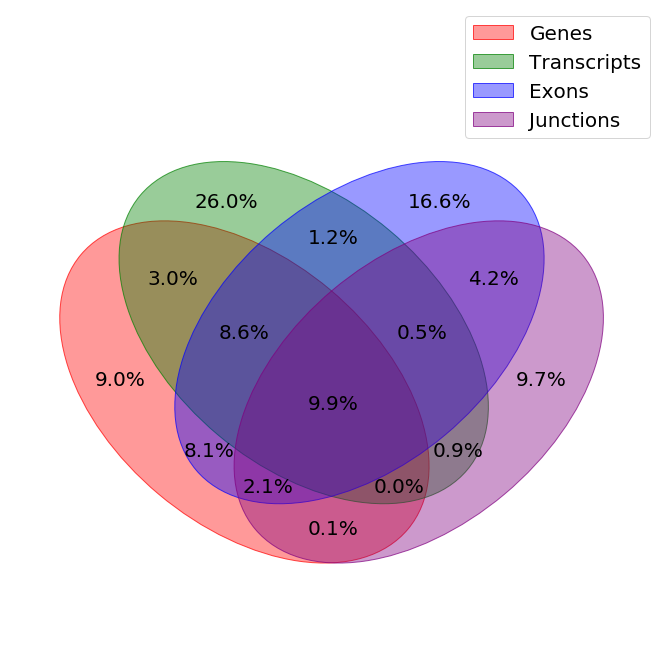

In [12]:
plt.figure(1)
venn(features, fmt="{percentage:0.1f}%", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_allFeatures_venn_diagram_percentage.png')
plt.savefig('DE_allFeatures_venn_diagram_percentage.pdf')
plt.savefig('DE_allFeatures_venn_diagram_percentage.svg')
plt.show()

<Figure size 432x288 with 0 Axes>

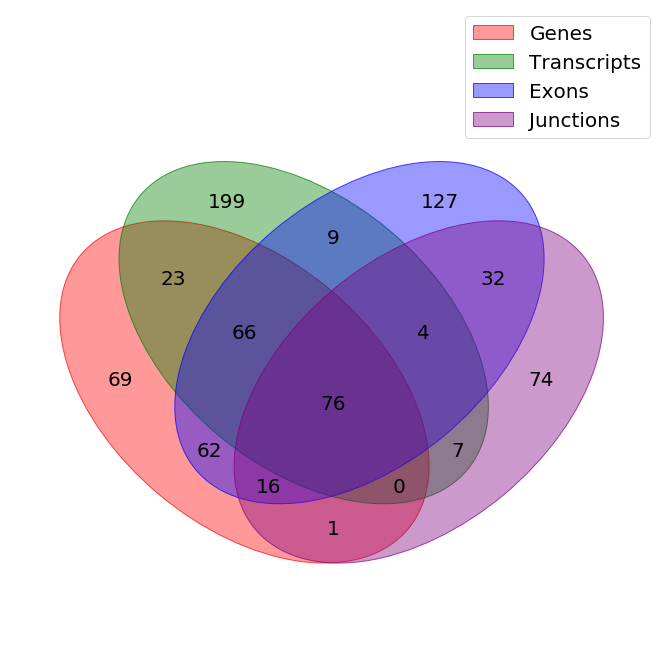

In [13]:
plt.figure(1)
venn(features, fmt="{size}", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_allFeatures_venn_diagram_size.png')
plt.savefig('DE_allFeatures_venn_diagram_size.pdf')
plt.savefig('DE_allFeatures_venn_diagram_size.svg')
plt.show()

## Autosomal only

In [10]:
import functools
from gtfparse import read_gtf

In [11]:
@functools.lru_cache()
def get_gtf(gtf_file):
    return read_gtf(gtf_file)


In [12]:
def gene_annotation(gtf_file, feature):
    gtf0 = get_gtf(gtf_file)
    gtf = gtf0[gtf0["feature"] == feature]
    return gtf[["gene_id", "gene_name", "transcript_id", "exon_id", "gene_type", "seqname", "start", "end", "strand"]]

In [13]:
gtf_file = '/ceph/genome/human/gencode25/gtf.CHR/_m/gencode.v25.annotation.gtf'

### Genes

In [15]:
gtf_annot = gene_annotation(gtf_file, 'gene')

genes = pd.read_csv('../../_m/genes/diffExpr_maleVfemale_full.txt', sep='\t')
genes = genes[(genes['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
genes['Feature'] = genes.index
genes = pd.merge(gtf_annot[['gene_id', 'seqname']], genes, left_on='gene_id', right_on='Feature', how='right').fillna('chr?')
genes.sort_values('adj.P.Val').to_csv('chrom_annotation_genes.txt', sep='\t', index=False)

genes = genes[(genes.seqname.str.contains('chr\d+')) | (genes['seqname'] == 'chr?')].copy().rename(columns={'seqname': 'chr'})
genes = genes[['Feature', 'chr', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
genes['Type'] = 'gene'
genes.head()

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_status', 'gene_name', 'level', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_status', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'ont', 'protein_id', 'ccdsid']


,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type
0,ENSG00000149527.17,chr1,PLCH2,ENSG00000149527,0.161412,1.604752e-03,gene
1,ENSG00000180758.11,chr1,GPR157,ENSG00000180758,-0.198121,1.917163e-02,gene
2,ENSG00000188807.12,chr1,TMEM201,ENSG00000188807,-0.080187,9.710938e-03,gene
3,ENSG00000162493.16,chr1,PDPN,ENSG00000162493,0.222743,3.370282e-02,gene
4,ENSG00000236698.1,chr1,EIF1AXP1,ENSG00000236698,-0.252245,2.293191e-15,gene


In [17]:
genes[(genes.chr == 'chr?')]

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type


### Annotate unknown by hand
There are none.

In [17]:
#genes = genes[~(genes['Symbol'].isin(['NLGN4Y', 'JPX', 'PCDH11X', 'GABRE']))]
genes.to_csv('autosomal_DEG.csv', index=False, header=True)
genes.shape

(225, 7)

### Exons

In [22]:
gtf_annot = gene_annotation(gtf_file, 'exon')
gtf_annot['ensemblID'] = gtf_annot.gene_id.str.replace('\\.\d+', '')

exons = pd.read_csv('../../_m/exons/diffExpr_maleVfemale_full.txt', sep='\t')
exons = exons[(exons['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
exons['Feature'] = exons.index
exons = pd.merge(gtf_annot[['ensemblID', 'seqname']], exons, on='ensemblID', how='right').fillna('chr?')
exons = exons[(exons.seqname.str.contains('chr\d+')) | (exons['seqname'] == 'chr?')].copy().rename(columns={'seqname': 'chr'})
exons = exons[['Feature', 'chr', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']].groupby('Feature').first().reset_index()
exons['Type'] = 'exon'
exons.head()

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type
0,e10034,chr1,VPS13D,ENSG00000048707,0.079926,4.577561e-02,exon
1,e1011449,chr19,SMIM24,ENSG00000095932,-0.894398,5.737724e-15,exon
2,e1011451,chr19,SMIM24,ENSG00000095932,-0.896084,6.284800e-15,exon
3,e1011454,chr19,SMIM24,ENSG00000095932,-0.883812,1.355311e-14,exon
4,e1014695,chr19,DUS3L,ENSG00000141994,-0.251465,2.902478e-02,exon


In [23]:
exons[(exons['chr'] == 'chr?')].groupby('ensemblID').first().reset_index()

,ensemblID,Feature,chr,Symbol,logFC,adj.P.Val,Type


### Annotate unknown by hand
There are none.

In [121]:
#exons = exons[~(exons['ensemblID'].isin(['ENSG00000269941']))]
exons.to_csv('exons_autosomal_DE.csv', index=False, header=True)
exons.shape

(846, 7)

### Junctions

In [24]:
juncs = pd.read_csv('../../_m/junctions/diffExpr_maleVfemale_full.txt', sep='\t')
juncs = juncs[(juncs['adj.P.Val'] < 0.05)].sort_values('adj.P.Val')
juncs['Feature'] = juncs.index
juncs = pd.merge(gtf_annot[['ensemblID', 'seqname']], juncs, on='ensemblID', how='right').fillna('chr?')
juncs = juncs[(juncs.seqname.str.contains('chr\d+')) | (juncs['seqname'] == 'chr?')].copy().rename(columns={'seqname': 'chr'})
juncs = juncs[['Feature', 'chr', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']].groupby('Feature').first().reset_index()
juncs['Type'] = 'junction'
juncs.head()

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type
0,chr10:102798096-102809892(+),chr10,WBP1L,ENSG00000166272,-0.131487,0.014097,junction
1,chr10:1086358-1093451(+),chr10,WDR37,ENSG00000047056,-0.103455,0.045234,junction
2,chr10:17229986-17230649(+),chr10,VIM,ENSG00000026025,0.157908,0.022224,junction
3,chr10:17233683-17233769(+),chr10,VIM,ENSG00000026025,0.148059,0.038693,junction
4,chr10:17234819-17235168(+),chr10,VIM,ENSG00000026025,0.153954,0.026465,junction


In [25]:
juncs[(juncs['chr'] == 'chr?')].groupby('ensemblID').first()

,Feature,chr,Symbol,logFC,adj.P.Val,Type
ensemblID,,,,,,
chr?,chr11:40140552-40140800(-),chr?,chr?,-0.364539,0.034196,junction


### Annotate unknown by hand
- Unknown, chr11

Could have split this by Feature, but using exons is faster

In [121]:
juncs.to_csv('junctions_autosomal_DE.csv', index=False, header=True)
juncs.shape

(846, 7)

## DE summary

### DE (feature)

In [6]:
gg = len(set(genes['Feature']))
ee = len(set(exons['Feature']))
jj = len(set(juncs['Feature']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		320
Transcript:	573
Exon:		1911
Junction:	940


#### DE (EnsemblID)

In [7]:
gg = len(set(genes['ensemblID']))
ee = len(set(exons['ensemblID']))
jj = len(set(juncs['ensemblID']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		320
Transcript:	382
Exon:		385
Junction:	211


#### DE (Gene Symbol)

In [8]:
gg = len(set(genes['Symbol']))
ee = len(set(exons['Symbol']))
jj = len(set(juncs['Symbol']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		282
Transcript:	371
Exon:		345
Junction:	211


### Feature effect size summary

In [9]:
feature_list = ['Genes', 'Exons', 'Junctions']
feature_df = [genes, exons, juncs]
for ii in range(3):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].Feature))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].Feature))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 76 unique Genes with abs(log2FC) >= 0.5
There are 41 unique Genes with abs(log2FC) >= 1

There are 264 unique Transcript with abs(log2FC) >= 0.5
There are 166 unique Transcript with abs(log2FC) >= 1

There are 667 unique Exons with abs(log2FC) >= 0.5
There are 417 unique Exons with abs(log2FC) >= 1

There are 388 unique Junctions with abs(log2FC) >= 0.5
There are 232 unique Junctions with abs(log2FC) >= 1


In [10]:
feature_list = ['Genes', 'Exons', 'Junctions']
feature_df = [genes, exons, juncs]
for ii in range(3):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].ensemblID))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].ensemblID))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 76 unique Genes with abs(log2FC) >= 0.5
There are 41 unique Genes with abs(log2FC) >= 1

There are 143 unique Transcripts with abs(log2FC) >= 0.5
There are 85 unique Transcripts with abs(log2FC) >= 1

There are 79 unique Exons with abs(log2FC) >= 0.5
There are 43 unique Exons with abs(log2FC) >= 1

There are 45 unique Junctions with abs(log2FC) >= 0.5
There are 23 unique Junctions with abs(log2FC) >= 1


## Plot venn diagram

In [31]:
features = {
    'Genes': set(genes['ensemblID']),
    'Exons': set(exons['ensemblID']),
    'Junctions': set(juncs['ensemblID']),
}

<Figure size 432x288 with 0 Axes>

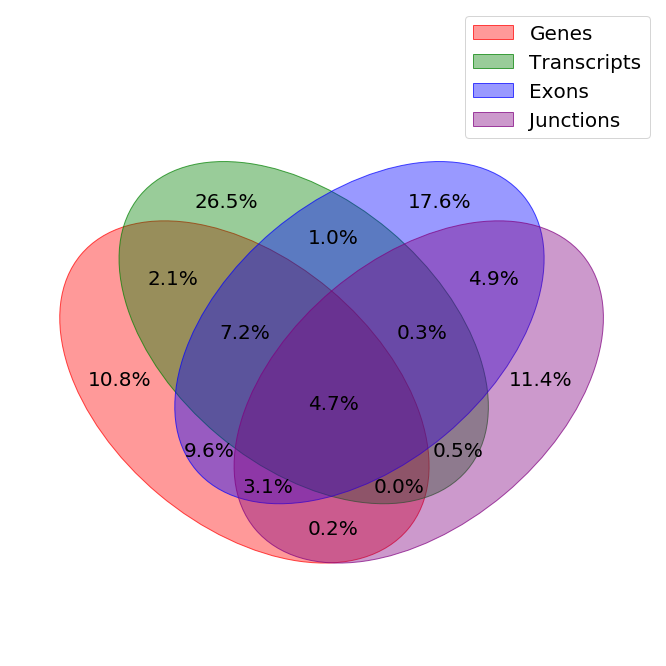

In [32]:
plt.figure(1)
venn(features, fmt="{percentage:0.1f}%", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_autosomal_allFeatures_venn_diagram_percentage.png')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_percentage.pdf')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_percentage.svg')
plt.show()

<Figure size 432x288 with 0 Axes>

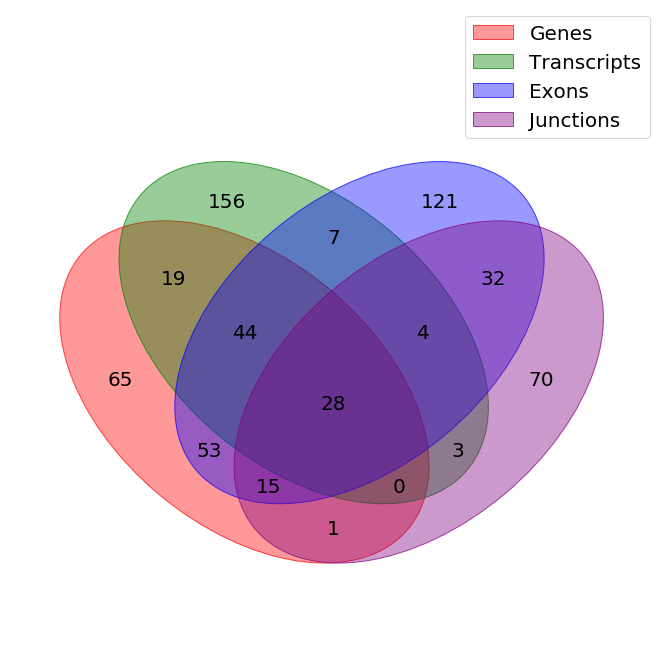

In [132]:
plt.figure(1)
venn(features, fmt="{size}", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_autosomal_allFeatures_venn_diagram_size.png')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_size.pdf')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_size.svg')
plt.show()

## Summary plots (FDR < 0.01)

### Genes

In [14]:
genes = pd.read_csv('../../_m/genes/diffExpr_maleVfemale_full.txt', sep='\t')
genes = genes[(genes['adj.P.Val'] < 0.01)].sort_values('adj.P.Val')
genes['Feature'] = genes.index
genes = genes[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
genes['Type'] = 'gene'
genes.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
ENSG00000226555.1,ENSG00000226555.1,AGKP1,ENSG00000226555,7.320836,4.214882e-258,gene
ENSG00000229236.1,ENSG00000229236.1,TTTY10,ENSG00000229236,7.483121,5.178977e-253,gene
ENSG00000176728.7,ENSG00000176728.7,TTTY14,ENSG00000176728,8.885118,2.323128e-251,gene
ENSG00000260197.1,ENSG00000260197.1,NaN,ENSG00000260197,7.071476,9.499938e-247,gene
ENSG00000241859.6,ENSG00000241859.6,ANOS2P,ENSG00000241859,7.682882,3.472081e-236,gene


### Exons

In [15]:
exons = pd.read_csv('../../_m/exons/diffExpr_maleVfemale_full.txt', sep='\t')
exons = exons[(exons['adj.P.Val'] < 0.01)].sort_values('adj.P.Val')
exons['Feature'] = exons.index
exons = exons[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
exons['Type'] = 'exon'
exons.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
e1160404,e1160404,XIST,ENSG00000229807,-7.980218,1.451491e-257,exon
e1160425,e1160425,XIST,ENSG00000229807,-7.056620,5.812736e-252,exon
e1160439,e1160439,XIST,ENSG00000229807,-8.172654,2.903277e-251,exon
e1160445,e1160445,XIST,ENSG00000229807,-9.047181,2.719706e-248,exon
e1160436,e1160436,XIST,ENSG00000229807,-8.507586,5.558094e-248,exon


### Junctions

In [16]:
juncs = pd.read_csv('../../_m/junctions/diffExpr_maleVfemale_full.txt', sep='\t')
juncs = juncs[(juncs['adj.P.Val'] < 0.01)].sort_values('adj.P.Val')
juncs['Feature'] = juncs.index
juncs = juncs[['Feature', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
juncs['Type'] = 'junction'
juncs.head()

,Feature,Symbol,ensemblID,logFC,adj.P.Val,Type
chrX:73833375-73837439(-),chrX:73833375-73837439(-),XIST,ENSG00000229807,-8.258540,3.484117e-225,junction
chrX:73831275-73833237(-),chrX:73831275-73833237(-),XIST,ENSG00000229807,-8.989492,8.639387e-225,junction
chrX:73827985-73829067(-),chrX:73827985-73829067(-),XIST,ENSG00000229807,-8.168128,2.072007e-213,junction
chrX:73822217-73826114(-),chrX:73822217-73826114(-),XIST,ENSG00000229807,-6.305238,1.320986e-212,junction
chrX:73829232-73831065(-),chrX:73829232-73831065(-),XIST,ENSG00000229807,-9.048627,3.785769e-207,junction


## DE summary

### DE (feature)

In [17]:
gg = len(set(genes['Feature']))
ee = len(set(exons['Feature']))
jj = len(set(juncs['Feature']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		173
Exon:		1401
Junction:	833


#### DE (EnsemblID)

In [18]:
gg = len(set(genes['ensemblID']))
ee = len(set(exons['ensemblID']))
jj = len(set(juncs['ensemblID']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		173
Exon:		233
Junction:	190


#### DE (Gene Symbol)

In [19]:
gg = len(set(genes['Symbol']))
ee = len(set(exons['Symbol']))
jj = len(set(juncs['Symbol']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		157
Exon:		212
Junction:	190


### Feature effect size summary

In [20]:
feature_list = ['Genes', 'Exons', 'Junctions']
feature_df = [genes, exons, juncs]
for ii in range(3):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].Feature))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].Feature))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 58 unique Genes with abs(log2FC) >= 0.5
There are 31 unique Genes with abs(log2FC) >= 1

There are 685 unique Exons with abs(log2FC) >= 0.5
There are 394 unique Exons with abs(log2FC) >= 1

There are 420 unique Junctions with abs(log2FC) >= 0.5
There are 214 unique Junctions with abs(log2FC) >= 1


In [21]:
feature_list = ['Genes', 'Exons', 'Junctions']
feature_df = [genes, exons, juncs]
for ii in range(3):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].ensemblID))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].ensemblID))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 58 unique Genes with abs(log2FC) >= 0.5
There are 31 unique Genes with abs(log2FC) >= 1

There are 65 unique Exons with abs(log2FC) >= 0.5
There are 32 unique Exons with abs(log2FC) >= 1

There are 43 unique Junctions with abs(log2FC) >= 0.5
There are 22 unique Junctions with abs(log2FC) >= 1


## Plot venn diagram

In [11]:
features = {
    'Genes': set(genes['ensemblID']),
    'Exons': set(exons['ensemblID']),
    'Junctions': set(juncs['ensemblID']),
}

<Figure size 432x288 with 0 Axes>

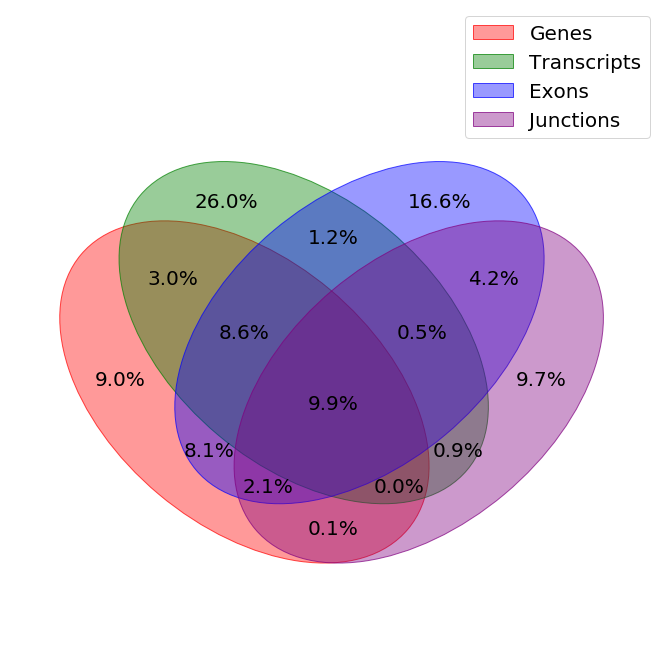

In [12]:
plt.figure(1)
venn(features, fmt="{percentage:0.1f}%", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_allFeatures_venn_diagram_percentage_fdr01.png')
plt.savefig('DE_allFeatures_venn_diagram_percentage_fdr01.pdf')
plt.savefig('DE_allFeatures_venn_diagram_percentage_fdr01.svg')
plt.show()

<Figure size 432x288 with 0 Axes>

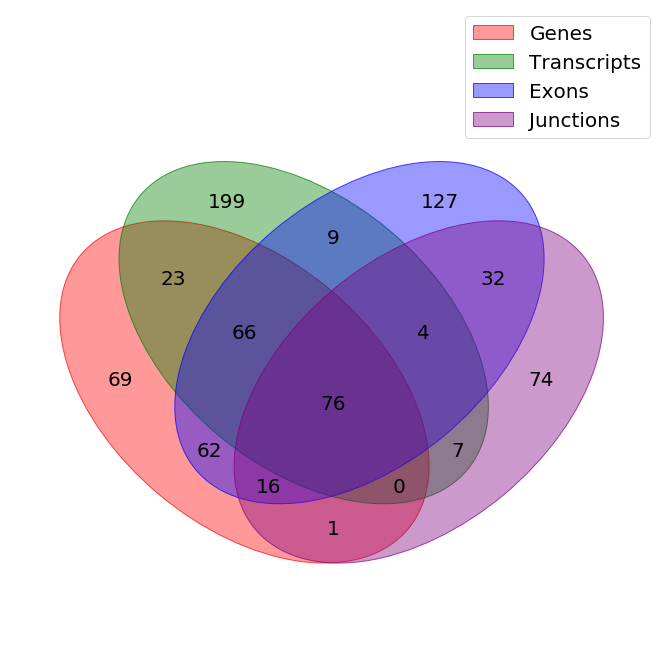

In [13]:
plt.figure(1)
venn(features, fmt="{size}", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_allFeatures_venn_diagram_size_fdr01.png')
plt.savefig('DE_allFeatures_venn_diagram_size_fdr01.pdf')
plt.savefig('DE_allFeatures_venn_diagram_size_fdr01.svg')
plt.show()

## Autosomal only

### Genes

In [22]:
gtf_annot = gene_annotation(gtf_file, 'gene')

genes = pd.read_csv('../../_m/genes/diffExpr_maleVfemale_full.txt', sep='\t')
genes = genes[(genes['adj.P.Val'] < 0.01)].sort_values('adj.P.Val')
genes['Feature'] = genes.index
genes = pd.merge(gtf_annot[['gene_id', 'seqname']], genes, left_on='gene_id', right_on='Feature', how='right').fillna('chr?')
genes.sort_values('adj.P.Val').to_csv('chrom_annotation_genes_fdr01.txt', sep='\t', index=False)

genes = genes[(genes.seqname.str.contains('chr\d+')) | (genes['seqname'] == 'chr?')].copy().rename(columns={'seqname': 'chr'})
genes = genes[['Feature', 'chr', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']]
genes['Type'] = 'gene'
genes.head()

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_status', 'gene_name', 'level', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_status', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'ont', 'protein_id', 'ccdsid']


,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type
0,ENSG00000116661.9,chr1,FBXO2,ENSG00000116661,0.117202,0.004428,gene
1,ENSG00000130770.17,chr1,ATPIF1,ENSG00000130770,0.099406,0.008137,gene
2,ENSG00000121769.7,chr1,FABP3,ENSG00000121769,0.225031,0.006340,gene
3,ENSG00000160051.11,chr1,IQCC,ENSG00000160051,0.131279,0.003255,gene
4,ENSG00000162373.12,chr1,BEND5,ENSG00000162373,0.137161,0.009104,gene


In [23]:
genes[(genes.chr == 'chr?')]

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type


### Annotate unknown by hand
There are none.

In [24]:
#genes = genes[~(genes['Symbol'].isin(['NLGN4Y', 'JPX', 'PCDH11X', 'GABRE']))]
genes.to_csv('autosomal_DEG_fdr01.csv', index=False, header=True)
genes.shape

(110, 7)

### Exons

In [25]:
gtf_annot = gene_annotation(gtf_file, 'exon')
gtf_annot['ensemblID'] = gtf_annot.gene_id.str.replace('\\.\d+', '')

exons = pd.read_csv('../../_m/exons/diffExpr_maleVfemale_full.txt', sep='\t')
exons = exons[(exons['adj.P.Val'] < 0.01)].sort_values('adj.P.Val')
exons['Feature'] = exons.index
exons = pd.merge(gtf_annot[['ensemblID', 'seqname']], exons, on='ensemblID', how='right').fillna('chr?')
exons = exons[(exons.seqname.str.contains('chr\d+')) | (exons['seqname'] == 'chr?')].copy().rename(columns={'seqname': 'chr'})
exons = exons[['Feature', 'chr', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']].groupby('Feature').first().reset_index()
exons['Type'] = 'exon'
exons.head()

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type
0,e1007180,chr19,CNN2,ENSG00000064666,-0.394004,3.335255e-03,exon
1,e1007236,chr19,CNN2,ENSG00000064666,-0.399540,9.674705e-03,exon
2,e1007237,chr19,CNN2,ENSG00000064666,-0.379881,5.975552e-03,exon
3,e1011449,chr19,SMIM24,ENSG00000095932,-0.653989,2.804125e-10,exon
4,e1011451,chr19,SMIM24,ENSG00000095932,-0.652807,2.914130e-10,exon


In [26]:
exons[(exons['chr'] == 'chr?')].groupby('ensemblID').first().reset_index()

,ensemblID,Feature,chr,Symbol,logFC,adj.P.Val,Type


### Annotate unknown by hand
There are none.

In [27]:
#exons = exons[~(exons['ensemblID'].isin(['ENSG00000269941']))]
exons.to_csv('exons_autosomal_DE_fdr01.csv', index=False, header=True)
exons.shape

(505, 7)

### Junctions

In [28]:
juncs = pd.read_csv('../../_m/junctions/diffExpr_maleVfemale_full.txt', sep='\t')
juncs = juncs[(juncs['adj.P.Val'] < 0.01)].sort_values('adj.P.Val')
juncs['Feature'] = juncs.index
juncs = pd.merge(gtf_annot[['ensemblID', 'seqname']], juncs, on='ensemblID', how='right').fillna('chr?')
juncs = juncs[(juncs.seqname.str.contains('chr\d+')) | (juncs['seqname'] == 'chr?')].copy().rename(columns={'seqname': 'chr'})
juncs = juncs[['Feature', 'chr', 'Symbol', 'ensemblID', 'logFC', 'adj.P.Val']].groupby('Feature').first().reset_index()
juncs['Type'] = 'junction'
juncs.head()

,Feature,chr,Symbol,ensemblID,logFC,adj.P.Val,Type
0,chr10:125807488-125812213(-),chr10,UROS,ENSG00000188690,0.157694,0.001749,junction
1,chr10:22537282-22539970(-),chr10,PIP4K2A,ENSG00000150867,-0.347583,0.001189,junction
2,chr10:22540075-22541803(-),chr10,PIP4K2A,ENSG00000150867,-0.327656,0.003117,junction
3,chr10:22550773-22567850(-),chr10,PIP4K2A,ENSG00000150867,-0.340339,0.002402,junction
4,chr10:22567890-22573310(-),chr10,PIP4K2A,ENSG00000150867,-0.322239,0.004440,junction


In [29]:
juncs[(juncs['chr'] == 'chr?')].groupby('ensemblID').first()

,Feature,chr,Symbol,logFC,adj.P.Val,Type
ensemblID,,,,,,
chr?,chr14:49575780-49586655(+),chr?,chr?,-2.484372,0.008327,junction


### Annotate unknown by hand
- Unknown, chr14

Could have split this by Feature, but using exons is faster

In [30]:
juncs.to_csv('junctions_autosomal_DE_fdr01.csv', index=False, header=True)
juncs.shape

(322, 7)

## DE summary

### DE (feature)

In [31]:
gg = len(set(genes['Feature']))
ee = len(set(exons['Feature']))
jj = len(set(juncs['Feature']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		110
Exon:		505
Junction:	322


#### DE (EnsemblID)

In [32]:
gg = len(set(genes['ensemblID']))
ee = len(set(exons['ensemblID']))
jj = len(set(juncs['ensemblID']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		110
Exon:		169
Junction:	143


#### DE (Gene Symbol)

In [33]:
gg = len(set(genes['Symbol']))
ee = len(set(exons['Symbol']))
jj = len(set(juncs['Symbol']))

print("\nGene:\t\t%d\nExon:\t\t%d\nJunction:\t%d" % (gg, ee, jj)) 


Gene:		99
Exon:		158
Junction:	143


### Feature effect size summary

In [34]:
feature_list = ['Genes', 'Exons', 'Junctions']
feature_df = [genes, exons, juncs]
for ii in range(3):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].Feature))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].Feature))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 20 unique Genes with abs(log2FC) >= 0.5
There are 2 unique Genes with abs(log2FC) >= 1

There are 121 unique Exons with abs(log2FC) >= 0.5
There are 4 unique Exons with abs(log2FC) >= 1

There are 126 unique Junctions with abs(log2FC) >= 0.5
There are 28 unique Junctions with abs(log2FC) >= 1


In [35]:
feature_list = ['Genes', 'Exons', 'Junctions']
feature_df = [genes, exons, juncs]
for ii in range(3):
    ff = feature_df[ii]
    half = len(set(ff[(np.abs(ff['logFC']) >= 0.5)].ensemblID))
    one = len(set(ff[(np.abs(ff['logFC']) >= 1)].ensemblID))
    print("\nThere are %d unique %s with abs(log2FC) >= 0.5" % (half, feature_list[ii]))
    print("There are %d unique %s with abs(log2FC) >= 1" % (one, feature_list[ii]))


There are 20 unique Genes with abs(log2FC) >= 0.5
There are 2 unique Genes with abs(log2FC) >= 1

There are 21 unique Exons with abs(log2FC) >= 0.5
There are 3 unique Exons with abs(log2FC) >= 1

There are 13 unique Junctions with abs(log2FC) >= 0.5
There are 1 unique Junctions with abs(log2FC) >= 1


## Plot venn diagram

In [31]:
features = {
    'Genes': set(genes['ensemblID']),
    'Exons': set(exons['ensemblID']),
    'Junctions': set(juncs['ensemblID']),
}

<Figure size 432x288 with 0 Axes>

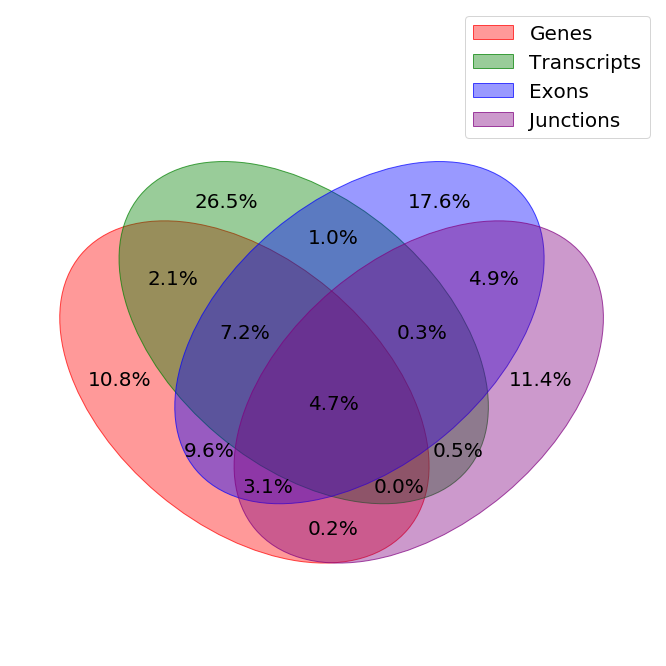

In [32]:
plt.figure(1)
venn(features, fmt="{percentage:0.1f}%", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_autosomal_allFeatures_venn_diagram_percentage_fdr01.png')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_percentage_fdr01.pdf')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_percentage_fdr01.svg')
plt.show()

<Figure size 432x288 with 0 Axes>

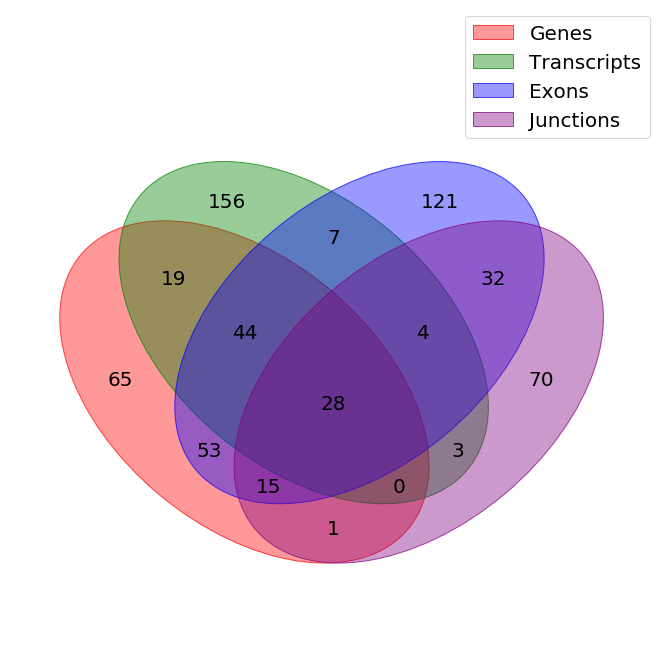

In [132]:
plt.figure(1)
venn(features, fmt="{size}", legend_loc="best", figsize=(12,12), 
     fontsize=20, cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('DE_autosomal_allFeatures_venn_diagram_size_fdr01.png')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_size_fdr01.pdf')
plt.savefig('DE_autosomal_allFeatures_venn_diagram_size_fdr01.svg')
plt.show()